# COVID-19 STATISTICAL  ANALYSIS #

The following is an analysis on Covid-19 data obtained from  https://covid.cdc.gov/covid-data-tracker/#cases_casesper10 


## Step one: Import and clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as s
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the data from csv file for specific columns that we need, and filling N/A values with 0. In a later step, we'll
# delete out any rows that we don't want to include in the study. 

file = 'COVID19_original_data.csv'

df = pd.read_csv(file, usecols = ['State/Territory', 'Total Cases', 'Total Deaths', 'Case Rate per 100000', 'Death Rate per 100000', 
                                 'Total % Positive', '# Tests per 100K', 'Total # Tests']).fillna(0)

df.head(60)

,State/Territory,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000,Total % Positive,# Tests per 100K,Total # Tests
0,Alabama,1555092.0,31716.0,20682.0,421.0,10-14.9%,176701.9904,8696445.0
1,Alaska,287057.0,39240.0,1399.0,191.0,8-9.9%,641181.1127,4688047.0
2,American Samoa,8264.0,17438.0,34.0,71.0,0,0.0000,0.0
3,Arizona,2353530.0,32334.0,31822.0,437.0,10-14.9%,213630.7821,15854397.0
4,Arkansas,972465.0,32224.0,12603.0,417.0,10-14.9%,172939.0844,5240957.0
5,California,11602129.0,29363.0,96995.0,245.0,0,419760.3805,165251594.0
6,Colorado,1715920.0,29797.0,13682.0,237.0,8-9.9%,322014.4776,18701696.0
7,Connecticut,930098.0,26088.0,11603.0,325.0,5-7.9%,455956.7232,16218408.0
8,Delaware,318134.0,32670.0,3172.0,325.0,8-9.9%,415363.0540,4098840.0
9,District of Columbia,172044.0,24378.0,1407.0,199.0,3-4.9%,800385.6535,5705277.0


In [3]:
df2 = df.set_index('State/Territory')
df2

,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000,Total % Positive,# Tests per 100K,Total # Tests
State/Territory,,,,,,,
Alabama,1555092.0,31716.0,20682.0,421.0,10-14.9%,176701.9904,8696445.0
Alaska,287057.0,39240.0,1399.0,191.0,8-9.9%,641181.1127,4688047.0
American Samoa,8264.0,17438.0,34.0,71.0,0,0.0000,0.0
Arizona,2353530.0,32334.0,31822.0,437.0,10-14.9%,213630.7821,15854397.0
Arkansas,972465.0,32224.0,12603.0,417.0,10-14.9%,172939.0844,5240957.0
...,...,...,...,...,...,...,...
Virginia,2159703.0,25302.0,22507.0,263.0,10-14.9%,196074.2969,16843886.0
Washington,1866343.0,24509.0,14829.0,194.0,5-7.9%,234585.5497,18048102.0
West Virginia,616506.0,34400.0,7636.0,426.0,10-14.9%,325490.2126,5809307.0


In [5]:
# deleting US Territories so the data only includes US States, Washington DC, and NYC (separate from NY state)

df3 = df2.drop(['Federated States of Micronesia','United States of America','Palau','American Samoa','Guam',
                'Northern Mariana Islands','Puerto Rico','Republic of Marshall Islands','Virgin Islands'])
df3.head(60)

,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000,Total % Positive,# Tests per 100K,Total # Tests
State/Territory,,,,,,,
Alabama,1555092.0,31716.0,20682.0,421.0,10-14.9%,176701.9904,8696445.0
Alaska,287057.0,39240.0,1399.0,191.0,8-9.9%,641181.1127,4688047.0
Arizona,2353530.0,32334.0,31822.0,437.0,10-14.9%,213630.7821,15854397.0
Arkansas,972465.0,32224.0,12603.0,417.0,10-14.9%,172939.0844,5240957.0
California,11602129.0,29363.0,96995.0,245.0,0,419760.3805,165251594.0
Colorado,1715920.0,29797.0,13682.0,237.0,8-9.9%,322014.4776,18701696.0
Connecticut,930098.0,26088.0,11603.0,325.0,5-7.9%,455956.7232,16218408.0
Delaware,318134.0,32670.0,3172.0,325.0,8-9.9%,415363.0540,4098840.0
District of Columbia,172044.0,24378.0,1407.0,199.0,3-4.9%,800385.6535,5705277.0


note: I'm choosing to keep NYC separate from NY state in this analysis because NYC is a very different area from the rest of the state. It makes sense to leave the data as is to illustrate how severe cases were in the city only compared to the rest of the state and country.

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total Cases            52 non-null     float64
 1   Case Rate per 100000   52 non-null     float64
 2   Total Deaths           52 non-null     float64
 3   Death Rate per 100000  52 non-null     float64
 4   Total % Positive       52 non-null     object 
 5   # Tests per 100K       52 non-null     float64
 6   Total # Tests          52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


In [7]:
# creating a variable that can be used to convert the data types of multiple columns at one time.

convert_dict = {'Total Cases' : int, 'Case Rate per 100000' : int, 'Total Deaths' : int, 'Death Rate per 100000':int, 
               '# Tests per 100K':int, 'Total # Tests':int}

In [8]:
df3= df3.astype(convert_dict)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Total Cases            52 non-null     int32 
 1   Case Rate per 100000   52 non-null     int32 
 2   Total Deaths           52 non-null     int32 
 3   Death Rate per 100000  52 non-null     int32 
 4   Total % Positive       52 non-null     object
 5   # Tests per 100K       52 non-null     int32 
 6   Total # Tests          52 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 2.0+ KB


## Step 2: Calculate the Descriptive Statistics

In [9]:
df3.describe().round(2)

,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000,# Tests per 100K,Total # Tests
count,52.00,52.00,52.00,52.00,52.00,5.200000e+01
mean,1886009.02,30104.13,20660.90,319.06,287925.21,1.877200e+07
std,2103054.72,4088.89,21757.52,88.29,176334.97,2.794184e+07
min,147221.00,21419.00,781.00,120.00,0.00,0.000000e+00
25%,537032.25,27787.00,5013.25,257.00,194093.00,4.245114e+06
50%,1386230.50,30513.00,14300.00,329.50,240381.00,1.020577e+07
75%,2364959.00,32274.00,27750.75,387.00,342542.25,2.047870e+07
max,11602129.00,39520.00,96995.00,516.00,800385.00,1.652516e+08


The descriptive statistics shown above are related to the 50 US States, Washington DC, and New York City (separate from NY state). The data pulled from the CDC's website lets us know that the raw data is related to all information available since January 21,2020.

The first things to look at here is the mean for each of the variables. 
Total Cases: 1,886,002
Case Rate per 100k: 301,104
Total Deaths: 20,660.09
Deaths Per 100K: 319
Number of Tests per 100K: 287,925.21 

There are some interesting conclusions to pull from this. First, there were 30,000 cases of COVID-19 for every 100,000 people, or put simply, 30% of the study size. In terms of deaths, there were only 319 deaths for every 100,000 people, or .00319%. While there is a huge disparity between case rate % and death rate %, its important to remember that this data includes everything since January 21,2020. Rather than measuring the entire population for statistical conclusions, it might make more sense to measure a sample of the data for a particular date range.

The standard deviation for Case Rate and Death Rate seems to be relatively normal. Case Rate is 4,088 is indicates that the case rate data points, on average, are about 4000 cases off from the mean of 30k. For deaths, data points are about 88 deaths off from the average of 319. 


## Step 3: Create a bell curve demonstrating the distribution of the data for Cases per 100k

In [10]:
#calculate the z-score of the case rate data
# z-score = column - mean(column) / std(column)

df3['Case Rate z-score'] = (df3['Case Rate per 100000'] - df3['Case Rate per 100000'].mean()) / df3['Case Rate per 100000'].std()

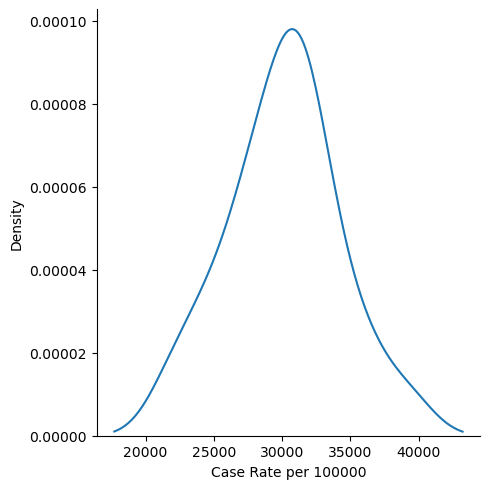

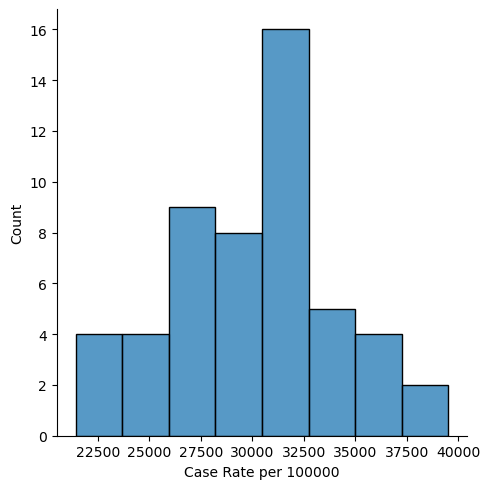

In [42]:
z = sns.displot(data = df3, x= 'Case Rate per 100000', kind='kde', cut=2 )
z2 = sns.displot(data = df3, x= 'Case Rate per 100000')

The above illustration confirms that the Case Rate per 100k is indeed a bell shape, and therefore follows a normal distribution. Because of this, we can also recognize the Empirical Rule which suggests that 68% of our data points fall within 1 standard deviation of the mean, 95% fall within 2 standard deviations, and 99.7% fall within 3 standard deviations. 

## Step 4: Run a linear regression for Death Rate per 100,000 (dependent variable)

<AxesSubplot: xlabel='Case Rate per 100000', ylabel='Death Rate per 100000'>

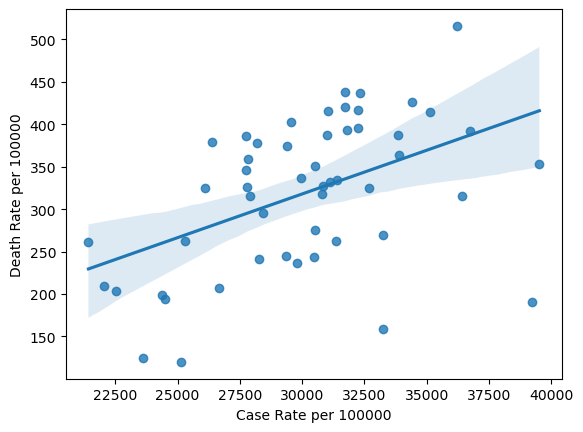

In [29]:
sns.regplot(data = df3, x='Case Rate per 100000', y='Death Rate per 100000')

In [ ]:
The above illustration is a linear regression demonstrating the correlation between Case Rate and Death Rate, where Death
Rate (y) is dependent on Case Rate (x), the independent variable. Based on this illustration, 
we can say with confidence that there is a positive correlation where deaths increase as cases increase.
We also can say based on the blue shaded area (the confidence interval for the regression line), that there is a strong
level of certainty with the regression line, making it a good fit for this model. 

## Step 5: Investigate the Total % Positive Rate

In [48]:
df3.groupby(['Total % Positive'])['Total % Positive'].count()

Total % Positive
0            6
10-14.9%    20
15-19.9%     4
20-24.9%     1
3-4.9%       3
5-7.9%       8
8-9.9%      10
Name: Total % Positive, dtype: int64

In [43]:
df3.groupby('Total % Positive')
print(df3.groupby('Total % Positive').groups)

{0: ['California', 'Hawaii', 'Iowa', 'Nevada', 'New York City', 'Tennessee'], '10-14.9%': ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Indiana', 'Kansas', 'Kentucky', 'Michigan', 'Missouri', 'Montana', 'Nebraska', 'North Carolina', 'Ohio', 'Pennsylvania', 'South Carolina', 'Texas', 'Utah', 'Virginia', 'West Virginia'], '15-19.9%': ['Idaho', 'Mississippi', 'New Mexico', 'South Dakota'], '20-24.9%': ['Oklahoma'], '3-4.9%': ['District of Columbia', 'Massachusetts', 'Vermont'], '5-7.9%': ['Connecticut', 'Illinois', 'Maine', 'New Hampshire', 'New York*', 'North Dakota', 'Rhode Island', 'Washington'], '8-9.9%': ['Alaska', 'Colorado', 'Delaware', 'Louisiana', 'Maryland', 'Minnesota', 'New Jersey', 'Oregon', 'Wisconsin', 'Wyoming']}


The main takeaway with this research is recognizing the bins for Total % Positive for this study and finding the states that 
fall into the highest bins. In this case, 1 state (Oklahoma) falls in the bin for 20-24.9% positive. Four states follow closely
behind at 15-19.9% (Idaho, Mississippi, New Mexico, and South Dakota). We also need to recognize that data for 
six states is being recorded for a 0% positivity rate which is inaccurate (California, Hawaii, Iowa, Nevada, New York City, and
Tennessee.) We can infer that the data for testing for these locations was either not recorded or provided to the CDC for this
study. 

## Step 6: Find the top 10 states with "Total Deaths" and illustrate with MatPlotLib

In [54]:
df4 = df3.nlargest(10, 'Total Deaths')
df4

,Total Cases,Case Rate per 100000,Total Deaths,Death Rate per 100000,Total % Positive,# Tests per 100K,Total # Tests,Case Rate z-score
State/Territory,,,,,,,,
California,11602129,29363,96995,245,0,419760,165251594,-0.181256
Texas,8095528,27920,91505,315,10-14.9%,188150,55242383,-0.534163
Florida,7270113,33850,83195,387,10-14.9%,296611,64463464,0.916108
Pennsylvania,3374733,26361,48527,379,10-14.9%,230035,29405959,-0.915441
New York City,3041810,36217,43396,516,0,0,0,1.494994
Georgia,2943519,27724,41070,386,10-14.9%,180527,19334505,-0.582098
Ohio,3243850,27751,40558,346,10-14.9%,207497,24263107,-0.575495
Illinois,3900000,30777,40385,318,5-7.9%,421975,53116271,0.164559
Michigan,2950361,29542,40327,403,10-14.9%,276994,27606829,-0.137479


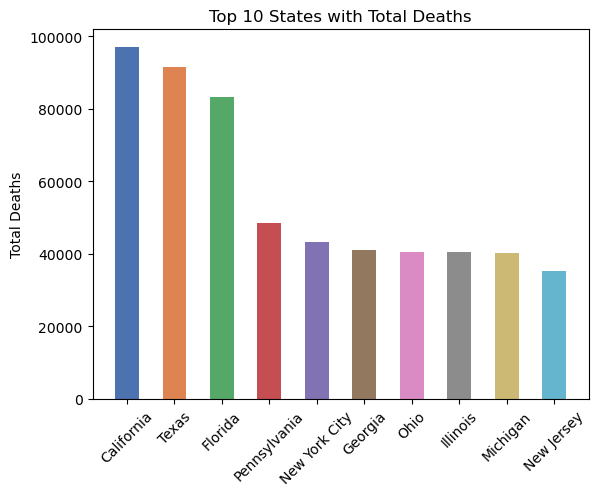

In [67]:
colors=sns.color_palette('deep')

plt.bar(df4.index, df4['Total Deaths'], color=colors, width =.5)

plt.title('Top 10 States with Total Deaths')
plt.xticks(df4.index, rotation=45, fontsize=10)
plt.ylabel('Total Deaths')

plt.show()
